<a href="https://colab.research.google.com/github/ameenattar92/Cardiovascular-Risk-Prediction/blob/main/Vridhi_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [442]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, log_loss, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, classification_report
from sklearn.model_selection import GridSearchCV



%matplotlib inline

In [443]:
path = '/content/drive/MyDrive/Capstone_project3/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

In [444]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [446]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [447]:
# fill value with mode for qualitative values
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['is_smoking'].fillna(df['is_smoking'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
# fill values with mean for quantitative values
df.fillna(df.mean(axis=0), inplace=True)

In [448]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [449]:
df.drop(columns=['id'],inplace=True)

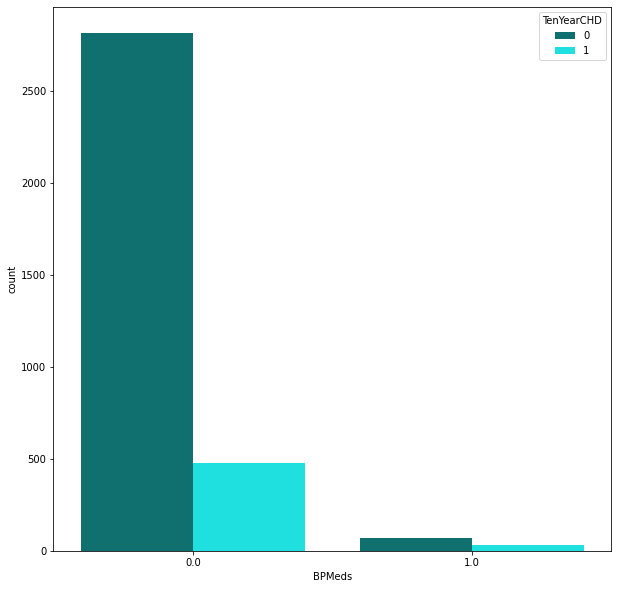

In [450]:
my_palette = {0 : 'teal' , 1 : 'cyan'}
plt.figure(figsize = (10,10))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)

  
plt.show()

In [451]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [452]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


### Building Desicion Tree Model
Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [453]:
X = df.drop(columns='TenYearCHD').values
y = df['TenYearCHD'].values

In [454]:
X.shape

(3390, 15)

spliting the data

In [455]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=324)

In [456]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2712, 15)
(2712,)
(678, 15)
(678,)


In [457]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="gini",max_leaf_nodes= 10,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting on test cell and train cell

In [458]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [459]:
test_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [460]:
y_test[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [461]:
train_preds[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Measuing accuracy

In [462]:
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')

the testing accuracy is 84.95575221238938


In [463]:
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the training accuracy is 85.76696165191741


In [464]:
#visualisation of decision tree model
from sklearn import tree


[Text(393.46153846153845, 830.5, 'X[10] <= 144.75\ngini = 0.257\nsamples = 2712\nvalue = [2302, 410]'),
 Text(143.07692307692307, 679.5, 'X[0] <= 46.5\ngini = 0.199\nsamples = 2057\nvalue = [1826, 231]'),
 Text(71.53846153846153, 528.5, 'gini = 0.124\nsamples = 1022\nvalue = [954, 68]'),
 Text(214.61538461538458, 528.5, 'X[14] <= 142.5\ngini = 0.265\nsamples = 1035\nvalue = [872, 163]'),
 Text(143.07692307692307, 377.5, 'gini = 0.257\nsamples = 1022\nvalue = [867, 155]'),
 Text(286.15384615384613, 377.5, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(643.8461538461538, 679.5, 'X[0] <= 54.5\ngini = 0.397\nsamples = 655\nvalue = [476, 179]'),
 Text(500.7692307692307, 528.5, 'X[14] <= 265.0\ngini = 0.302\nsamples = 308\nvalue = [251, 57]'),
 Text(429.23076923076917, 377.5, 'X[2] <= 0.5\ngini = 0.291\nsamples = 305\nvalue = [251, 54]'),
 Text(357.6923076923077, 226.5, 'gini = 0.183\nsamples = 167\nvalue = [150, 17]'),
 Text(500.7692307692307, 226.5, 'X[9] <= 259.0\ngini = 0.392\nsamp

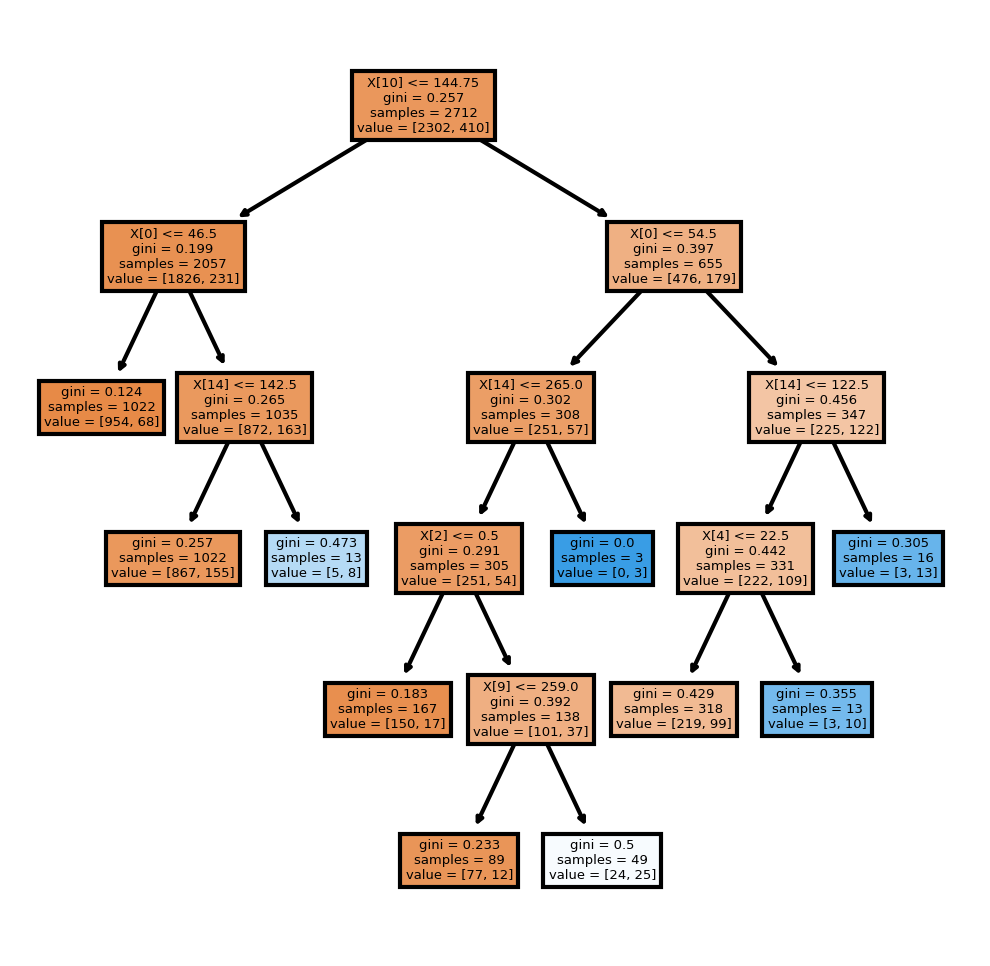

In [465]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[2267   35]
 [ 351   59]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

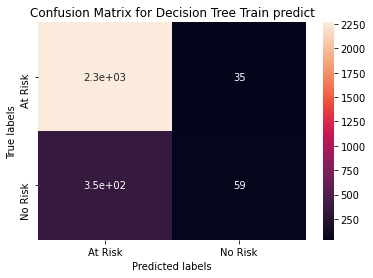

In [466]:
#the confusion matrix for training
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[566  11]
 [ 91  10]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

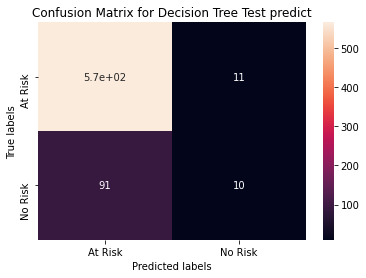

In [467]:
#the confusion matrix for test data
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [468]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2302
           1       0.63      0.14      0.23       410

    accuracy                           0.86      2712
   macro avg       0.75      0.56      0.58      2712
weighted avg       0.83      0.86      0.82      2712



In [469]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       577
           1       0.48      0.10      0.16       101

    accuracy                           0.85       678
   macro avg       0.67      0.54      0.54       678
weighted avg       0.80      0.85      0.81       678



## Building Ensembles of Decision Tree


In [470]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [471]:
#Random Forest
# classifier = RandomForestClassifier() 
# grid_values = {'n_estimators':[40,80,120,160], 'max_depth':[5, 7, 10, 15,20]}
# classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [472]:
classifier = RandomForestClassifier(n_estimators=30,max_depth=20,random_state=30,min_samples_split=3,criterion='entropy')

In [473]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [474]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

Finding the accuracy and Roc_Auc score

In [475]:
accuracy_score(y_train,train_preds)

0.9911504424778761

In [476]:
accuracy_score(y_test,test_preds)

0.8436578171091446

In [477]:
roc_auc_score(y_test,test_preds)

0.5160869639823602

In [478]:
roc_auc_score(y_train,train_preds)

0.9707317073170731

[[2302    0]
 [  24  386]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

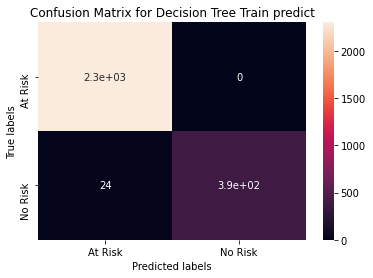

In [479]:
#the confusion matrix for training
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[567  10]
 [ 96   5]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

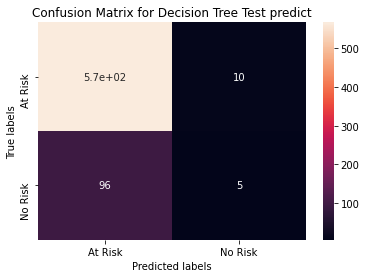

In [480]:
#the confusion matrix for test data
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [481]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2302
           1       1.00      0.94      0.97       410

    accuracy                           0.99      2712
   macro avg       0.99      0.97      0.98      2712
weighted avg       0.99      0.99      0.99      2712



In [482]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       577
           1       0.33      0.05      0.09       101

    accuracy                           0.84       678
   macro avg       0.59      0.52      0.50       678
weighted avg       0.78      0.84      0.79       678



In [510]:
plot_roc_curve(classifier,X,Y)
plt.title("Roc Auc Curve for Random_Forest")

NotFittedError: ignored

In [484]:
# Gradient Boost Classifier
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [485]:
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [486]:
gradientBC.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [487]:
train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

The accuracy and Roc_Auc Score

In [488]:
accuracy_score(y_train,train_preds)

0.8827433628318584

In [489]:
accuracy_score(y_test,test_preds)

0.8628318584070797

In [490]:
roc_auc_score(y_test,test_preds)


0.560023680010982

In [491]:
roc_auc_score(y_train,train_preds)

0.6131974317136741

[[2301    1]
 [ 317   93]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

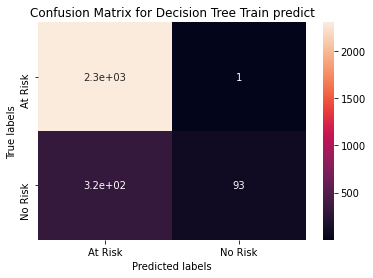

In [492]:
#the confusion matrix for training
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[572   5]
 [ 88  13]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

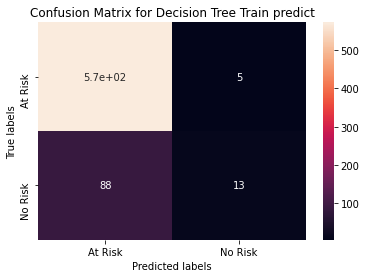

In [493]:
#the confusion matrix for testing
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Text(0.5, 1.0, 'Roc Auc Curve for Logistic Regression')

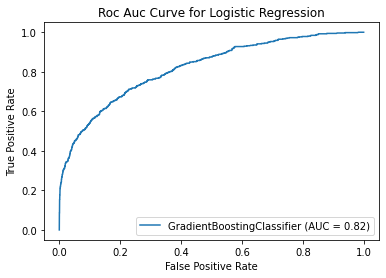

In [494]:
plot_roc_curve(gradientBC,X,Y)
plt.title("Roc Auc Curve for Gradient Boosting Classifier")

classification repost of train and test

In [495]:
print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       577
           1       0.72      0.13      0.22       101

    accuracy                           0.86       678
   macro avg       0.79      0.56      0.57       678
weighted avg       0.85      0.86      0.82       678



              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2302
           1       0.99      0.23      0.37       410

    accuracy                           0.88      2712
   macro avg       0.93      0.61      0.65      2712
weighted avg       0.90      0.88      0.85      2712



In [496]:
import xgboost as xgb

In [497]:
#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [498]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [499]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [500]:
accuracy_score(y_train,train_preds)

0.8458702064896755

In [501]:
accuracy_score(y_test,test_preds)

0.9056047197640118

In [502]:
roc_auc_score(y_test,test_preds)

0.6872522607546716

In [503]:
roc_auc_score(y_train,train_preds)

0.5253247441249391

[[2267   35]
 [ 383   27]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

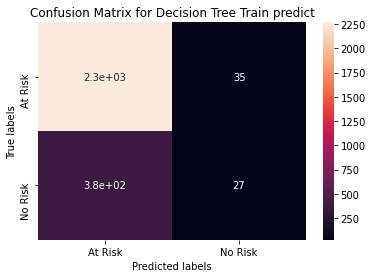

In [504]:
#the confusion matrix for training
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[576   1]
 [ 63  38]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

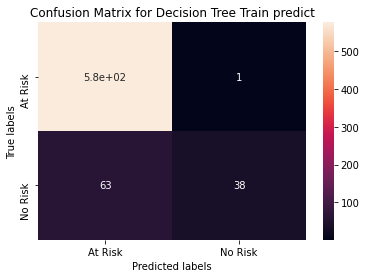

In [505]:
#the confusion matrix for testing
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Classifucation Repost For train and test

In [506]:
print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       577
           1       0.97      0.38      0.54       101

    accuracy                           0.91       678
   macro avg       0.94      0.69      0.75       678
weighted avg       0.91      0.91      0.89       678



              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2302
           1       0.44      0.07      0.11       410

    accuracy                           0.85      2712
   macro avg       0.65      0.53      0.51      2712
weighted avg       0.79      0.85      0.79      2712



Visualising the tree

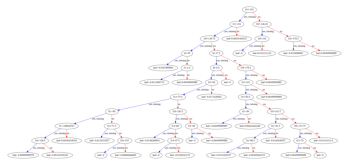

In [507]:
xgb.plot_tree(xg_cla,num_trees=0)

plt.show()

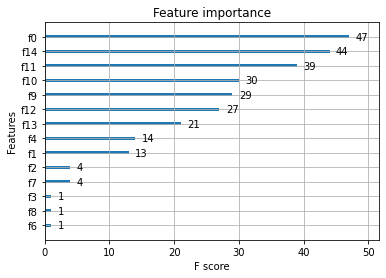

In [511]:
xgb.plot_importance(xg_cla)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()